# Khantil Choksi (khchoksi), Aman Chauhan (achauha3) 

## ALDA CSC 522 HW4

# Q1

## Import libraries

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from scipy.spatial import distance
%matplotlib inline

## Helper Functions

In [2]:
# Helper function to draw scatter plot
def scatter_plot(data, centroids, clusters):
    figure = plt.figure(figsize=(8,8))
    plt.scatter(data[:,0], data[:,1], color='b')
    colors_map = ['blue', 'green', 'red','black']
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    for i, text in enumerate(data_labels):
        plt.annotate(text, (data[i,0]*(1.04), data[i,1]*(1.04)), fontsize = 14)
    for i in range(k):
        plt.scatter(centroids[i,0], centroids[i,1], marker='*', color=colors_map[i], s=250)
    for i in range(n):
        plt.scatter(data[i,0], data[i,1],color=colors_map[clusters[i]])
    plt.grid(which='both', linestyle='dotted')
    plt.show() 

In [3]:
data = np.array([[1,8], [1,1], [2,4], [3,3], [4,9], [4,6], [6,4], [7,7], [9,9], [9,1]])

In [4]:
data_labels = np.array(['A','B','C','D','E','F','G','H','I','J'])

In [5]:
# Number of clusters: 3
k = 3 
# Number of datapoints: 10
n = 10

In [6]:
# Initial Seeds / Centroids
centroids = np.array([[1,1], [3,3], [9,1]])

epoch : 0


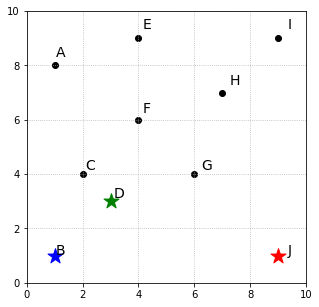

In [7]:
# Plot points
epoch = 0
print('epoch : '+str(epoch))
figure = plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], color='black')
colors_map = ['blue', 'green', 'red']
plt.xlim(0, 10)
plt.ylim(0, 10)
for i, text in enumerate(data_labels):
    plt.annotate(text, (data[i,0]*(1.04), data[i,1]*(1.04)), fontsize = 14)
for i in range(k):
    plt.scatter(centroids[i,0], centroids[i,1], marker='*', color=colors_map[i], s=250)

plt.grid(which='both', linestyle='dotted')
plt.show()

## (a) Running 1 round of K-means

epoch: 1
Distances from-
	Cluster_0 Centroid 	Cluster_1 Centroid 	Cluster_2 Centroid
	7.0000			5.3852			10.6301		
	0.0000			2.8284			8.0000		
	3.1623			1.4142			7.6158		
	2.8284			0.0000			6.3246		
	8.5440			6.0828			9.4340		
	5.8310			3.1623			7.0711		
	5.8310			3.1623			4.2426		
	8.4853			5.6569			6.3246		
	11.3137			8.4853			8.0000		
	8.0000			6.3246			0.0000		
----------------------------------------------
Coordinates of the new centroids :-
	Cluster_0 Centroid: 	7.0000	5.3852
	Cluster_1 Centroid: 	0.0000	2.8284
	Cluster_2 Centroid: 	3.1623	1.4142
------------------------------
New Clusters are :-
	Cluster_0 : B
	Cluster_1 : A C D E F G H
	Cluster_2 : I J


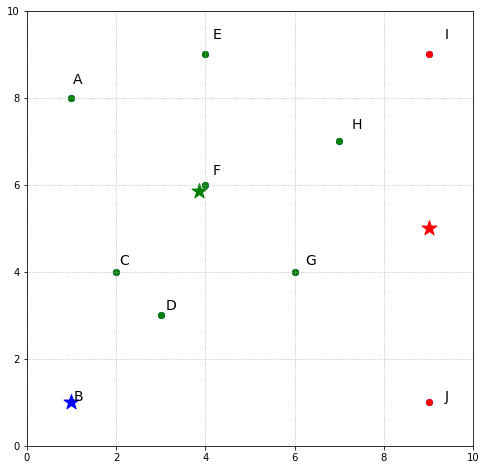

In [8]:
epoch += 1
print('epoch: '+str(epoch))
distances = np.zeros(shape=(n,k))
clusters = np.zeros(n)

new_centroids = np.zeros(centroids.shape)
old_centroids = deepcopy(centroids)


for i in range(k):
    distances[:,i] = np.linalg.norm(data - centroids[i], axis = 1)
clusters = np.argmin(distances, axis = 1)

old_centroids = deepcopy(new_centroids)

# print('\n Clusters: {}'.format(clusters))
# Calculating new centroids
for i in range(k):
    new_centroids[i] = np.mean([list(x) for x,y in zip(data,clusters) if y == i], axis=0)

    
print('Distances from-')
print('\tCluster_0 Centroid \tCluster_1 Centroid \tCluster_2 Centroid')
for i in range(n):
    for j in range(k):
        print ('\t{:.4f}\t\t'.format(distances[i][j]), end='')
    print()

print('----------------------------------------------')
print('Coordinates of the new centroids :-')
for i in range(k):
    print('\tCluster_{} Centroid: '.format(i), end='')
    for j in range(2):
        print ('\t{:.4f}'.format(distances[i][j]), end='')
    print()

print('------------------------------')
print('New Clusters are :-')
for i in range(k):
    print('\tCluster_{} : '.format(i), end='')
    print (' '.join(y for x,y in zip(clusters,data_labels) if x ==i))
    
scatter_plot(data, new_centroids,clusters)

## (b) K - means clustering alogrithm rounds

-------------------------------------------------------------
-------------------------------------------------------------
epoch : 2
Distances from-
	Cluster_0 Centroid 	Cluster_1 Centroid 	Cluster_2 Centroid
	7.0000			3.5714			8.5440		
	0.0000			5.6352			8.9443		
	3.1623			2.6264			7.0711		
	2.8284			2.9829			6.3246		
	8.5440			3.1461			6.4031		
	5.8310			0.2020			5.0990		
	5.8310			2.8356			3.1623		
	8.4853			3.3442			2.8284		
	11.3137			6.0271			4.0000		
	8.0000			7.0740			4.0000		
------------------------------
New Clusters are :-
	Cluster_0 : B D
	Cluster_1 : A C E F G
	Cluster_2 : H I J
---------------------------------------
Coordinates of the new centroids :-
	Cluster_0 Centroid: 	2.0000	2.0000
	Cluster_1 Centroid: 	3.4000	6.2000
	Cluster_2 Centroid: 	8.3333	5.6667


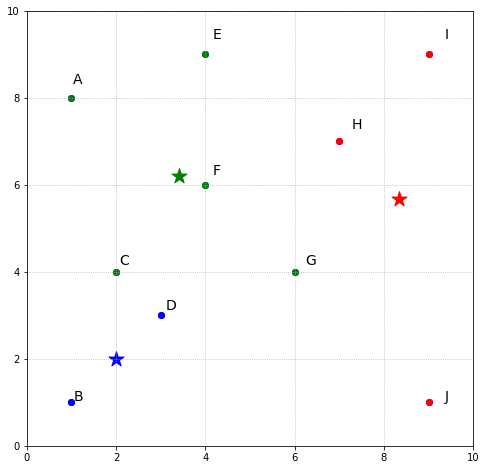

-------------------------------------------------------------
-------------------------------------------------------------
epoch : 3
Distances from-
	Cluster_0 Centroid 	Cluster_1 Centroid 	Cluster_2 Centroid
	6.0828			3.0000			7.6956		
	1.4142			5.7271			8.6923		
	2.0000			2.6077			6.5490		
	1.4142			3.2249			5.9628		
	7.2801			2.8636			5.4671		
	4.4721			0.6325			4.3461		
	4.4721			3.4059			2.8674		
	7.0711			3.6878			1.8856		
	9.8995			6.2610			3.3993		
	7.0711			7.6420			4.7140		
------------------------------
New Clusters are :-
	Cluster_0 : B C D
	Cluster_1 : A E F
	Cluster_2 : G H I J
---------------------------------------
Coordinates of the new centroids :-
	Cluster_0 Centroid: 	2.0000	2.6667
	Cluster_1 Centroid: 	3.0000	7.6667
	Cluster_2 Centroid: 	7.7500	5.2500


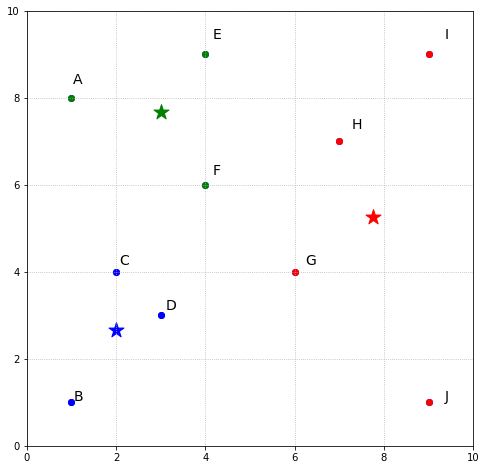

-------------------------------------------------------------
-------------------------------------------------------------
epoch : 4
Distances from-
	Cluster_0 Centroid 	Cluster_1 Centroid 	Cluster_2 Centroid
	5.4263			2.0276			7.2887		
	1.9437			6.9602			7.9765		
	1.3333			3.8006			5.8843		
	1.0541			4.6667			5.2559		
	6.6416			1.6667			5.3033		
	3.8873			1.9437			3.8243		
	4.2164			4.7376			2.1506		
	6.6165			4.0552			1.9039		
	9.4399			6.1464			3.9528		
	7.1957			8.9691			4.4300		
------------------------------
New Clusters are :-
	Cluster_0 : B C D
	Cluster_1 : A E F
	Cluster_2 : G H I J
---------------------------------------
Coordinates of the new centroids :-
	Cluster_0 Centroid: 	2.0000	2.6667
	Cluster_1 Centroid: 	3.0000	7.6667
	Cluster_2 Centroid: 	7.7500	5.2500


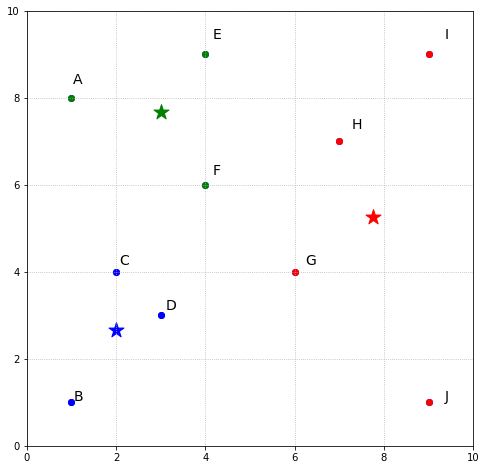

In [9]:
epoch = 2
while not np.array_equal(new_centroids, old_centroids) :
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('epoch : '+str(epoch))
#     distances = np.zeros(shape=(n,k))
#     clusters = np.zeros(k)

    for i in range(k):
        distances[:,i] = np.linalg.norm(data - new_centroids[i], axis = 1)
    clusters = np.argmin(distances, axis = 1)

    old_centroids = deepcopy(new_centroids)

    # Calculating new centroids
    # new_centroids[i] = np.mean(data[clusters == i], axis=0)
    for i in range(k):
        # print('Cluster points: {}'.format([list(x) for x,y in zip(data,clusters) if y == i]))
        new_centroids[i] = np.mean([list(x) for x,y in zip(data,clusters) if y == i], axis=0)

    print('Distances from-')
    print('\tCluster_0 Centroid \tCluster_1 Centroid \tCluster_2 Centroid')
    for i in range(n):
        for j in range(k):
            print ('\t{:.4f}\t\t'.format(distances[i][j]), end='')
        print()
    
    print('------------------------------')
    print('New Clusters are :-')
    for i in range(k):
        print('\tCluster_{} : '.format(i), end='')
        print (' '.join(y for x,y in zip(clusters,data_labels) if x ==i))
    
    print('---------------------------------------')
    print('Coordinates of the new centroids :-')
    for i in range(k):
        print('\tCluster_{} Centroid: '.format(i), end='')
        for j in range(2):
            print ('\t{:.4f}'.format(new_centroids[i][j]), end='')
        print()

    scatter_plot(data, new_centroids, clusters)
    epoch += 1

## Conclusion:

- Total 3 rounds required for K-means clustering algorithm to converge.
- Here in the figure, cluster's centroid points are indicated with star symbol.
- 3 clusters are denoted with blue, green and red.

## For Q2 (c) calculating SSE

In [10]:
#print('Distances from-')
#print('\tCluster_0 Centroid \tCluster_1 Centroid \tCluster_2 Centroid')
ss = 0
for i in range(k):
        cluster_points = [list(x) for x,y in zip(data,clusters) if y == i]
        # print('Cluster Points: {}'.format(cluster_points))
        distances = np.linalg.norm(cluster_points - new_centroids[i], axis = 1)
        ss += sum([x*x for x in distances ])
print('K-Means SSE: {}'.format(ss))

K-Means SSE: 60.83333333333333
